In [2]:
# https://pysathq.github.io/installation/
#
# pip install python-sat[aiger,approxmc,cryptosat,pblib]

from pysat.card import *
from pysat.solvers import *
from pysat.formula import CNF, CNFPlus
from pysat.formula import IDPool

In [3]:
cnf = CNF()
vpool = IDPool()

In [4]:
m, n = 25, 30 
# row, col

In [5]:
for i in range(1, m+1):
    for j in range(1, n+1):
        vpool.id((i, j))

In [6]:
import numpy as np

cat_bitmap = np.array([
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0],
    [0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0],
    [0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0],
    [0,0,0,1,0,0,0,1,1,0,0,0,1,1,1,1,1,1,1,0,0,1,0,0,1,0,0,0,0,0],
    [0,0,0,1,0,1,0,0,1,1,1,1,0,0,0,0,0,0,0,1,1,1,0,0,0,1,0,0,0,0],
    [0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0],
    [0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0],
    [0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0],
    [0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0],
    [0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0],
    [0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0],
    [0,0,0,0,0,1,0,0,1,1,1,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1,0,0,0],
    [0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0],
    [1,1,0,0,1,0,0,1,1,1,0,1,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,1,0,0],
    [0,0,1,1,1,0,0,1,1,1,1,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,1,0,0],
    [0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0],
    [1,1,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,1,1,1],
    [0,0,0,1,1,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,1,1,1,0,1,0,0],
    [0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0],
    [0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1],
    [0,0,0,0,0,1,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0],
    [0,0,0,0,0,0,1,1,0,0,0,1,1,1,1,1,1,1,1,1,1,1,0,0,0,1,0,0,0,0],
    [0,0,0,0,0,0,0,0,1,1,0,0,1,1,1,1,1,1,1,0,0,0,0,1,1,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0]
    ])

In [7]:
def get_r_vector(bitmap):
    return np.sum(bitmap, axis=1)

def get_c_vector(bitmap):
    return np.sum(bitmap, axis=0)

def get_a_vector(bitmap):
    flipped = np.fliplr(bitmap)
    antidiag_sums = [int(np.sum(np.diag(flipped, k=k))) for k in range(-bitmap.shape[0] + 1, bitmap.shape[1])]
    return np.flip(np.array(antidiag_sums))

def get_b_vector(bitmap):
    diag_sums = [np.sum(np.diag(bitmap, k=k)) for k in range(-bitmap.shape[0]+1, bitmap.shape[1])]
    return np.flip(diag_sums)


In [8]:
#cols = [2,2,2,10,8,10,4,6,9,7,5,7,6,8,5,7,4,6,7,6,6,11,5,7,6,8,7,7,2,2]
cols = get_c_vector(cat_bitmap)
assert len(cols) == n, len(cols)

#rows = [1,5,5,12,10,6,6,3,3,3,2,8,6,12,12,5,10,11,4,12,7,14,11,4,10]
rows = get_r_vector(cat_bitmap)
assert len(rows) == m, len(rows)

#a = [0,0,0,0,0,1,3,2,2,3,3,3,1,4,3,3,4,5,3,5,5,6,3,8,5,3,2,4,5,7,7,7,7,7,4,4,4,4,4,4,6,5,6,4,5,5,4,1,1,0,0,0,0,0]
a = get_a_vector(cat_bitmap)
assert len(a) == 54, len(a)

#b = [0,0,0,0,0,0,1,2,3,1,2,3,4,3,5,5,3,3,2,4,5,4,4,6,9,8,3,4,2,4,7,7,6,7,11,6,6,4,5,7,6,4,6,4,5,1,0,0,0,0,0,0,0,0]
b = get_b_vector(cat_bitmap)
assert len(b) == 54, len(b)

assert sum(cols) == sum(rows) == sum(a) == sum(b), (sum(cols), sum(rows), sum(a), sum(b))

assert np.array_equal(b,get_b_vector(cat_bitmap))

In [9]:
enc = EncType.seqcounter
#enc = EncType.totalizer
#enc = EncType.cardnetw

In [10]:
def encode_rows(cnf, vpool, rows, encoding):
    for i, row_i in enumerate(rows, start=1):
        lits = [vpool.id((i, j)) for j in range(1, n+1)]
        cnf.extend(CardEnc.equals(lits=lits, bound=row_i, vpool=vpool, encoding=encoding))

In [11]:
def encode_cols(cnf, vpool, cols, encoding):
    for j, col_j in enumerate(cols, start=1):
        lits = [vpool.id((i, j)) for i in range(1, m+1)]
        cnf.extend(CardEnc.equals(lits=lits, bound=col_j, vpool=vpool, encoding=encoding))

In [12]:
def encode_a_diagonals(cnf, vpool, a, encoding):
    for k, a_k in enumerate(a, start=1):
        lits = []

        current_point = (k, 1) if k <= m else (m, k - m + 1)

        while current_point[0] >= 1 and current_point[1] <= n:
            lits.append(vpool.id(current_point))
            current_point = (current_point[0] - 1, current_point[1] + 1)

        #print([vpool.obj(l) for l in lits])
        
        cnf.extend(CardEnc.equals(lits=lits, bound=a_k, vpool=vpool, encoding=encoding))

In [13]:
def encode_b_diagonals(cnf, vpool, b, encoding):
    for l, b_k in enumerate(b, start=1):
        lits = []

        current_point = (l, n) if l <= m else (m, n - (l - m))

        while current_point[0] >= 1 and current_point[1] >= 1:
            lits.append(vpool.id(current_point))
            current_point = (current_point[0] - 1, current_point[1] - 1)

        #print([vpool.obj(l) for l in lits])

        cnf.extend(CardEnc.equals(lits=lits, bound=b_k, vpool=vpool, encoding=encoding))

In [14]:
def encode_a_slope_diagonals(cnf, vpool, a_slope, k, encoding):
    for p, a_p in enumerate(a_slope, start=1):
        lits = []

        current_point = (p,1) if p <= m else (m, (p-m)*k + 1)

        while current_point[0] >= 1 and current_point[1] <= n:
            lits.append(vpool.id(current_point))
            current_point = (current_point[0] - 1, current_point[1] + 1) if current_point[1] % k == 0 else (current_point[0], current_point[1] + 1)

        #print([vpool.obj(l) for l in lits])    
    
        cnf.extend(CardEnc.equals(lits=lits, bound=a_p, vpool=vpool, encoding=encoding))

In [15]:
def encode_b_slope_diagonals(cnf, vpool, b_slope, k, encoding):
    for l, b_p in enumerate(b_slope, start=1):
        lits = []

        current_point = (l,n) if l <= m else (m, n - (l-m)*k)

        while current_point[0] >= 1 and current_point[1] >= 1:
            lits.append(vpool.id(current_point))
            current_point = (current_point[0] - 1, current_point[1] - 1) if current_point[1] % k == 1 else (current_point[0], current_point[1] - 1)

        #print([vpool.obj(l) for l in lits])
        
        cnf.extend(CardEnc.equals(lits=lits, bound=b_p, vpool=vpool, encoding=encoding))

In [16]:
encode_rows(cnf, vpool, rows, enc)
encode_cols(cnf, vpool, cols, enc)
encode_a_diagonals(cnf, vpool, a, enc)
encode_b_diagonals(cnf, vpool, b, enc)

In [17]:
from pysat.solvers import Cadical195

In [18]:
with Cadical195(bootstrap_with=cnf) as solver:
    print(solver.solve())
    model = solver.get_model()

True


In [ ]:
#print(model)

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt

In [20]:
def show_model(model, position=None):
    # Matrix of nans
    matrix = np.empty((m, n), dtype=int)
    matrix[:] = -1

    for var in model:
        if var > 0:
            name = vpool.obj(var)
            if isinstance(name, tuple) and len(name) == 2:
                matrix[name[0] - 1, name[1] - 1] = 0
        else:
            assert var < 0
            name = vpool.obj(-var)
            if isinstance(name, tuple) and len(name) == 2:
                matrix[name[0] - 1, name[1] - 1] = 1

    assert np.max(matrix) == 1 and np.min(matrix) == 0

    matrix = matrix.astype(bool)

    plt.clf()  # Clear the current figure
    plt.imshow(matrix, cmap='gray', interpolation='nearest')

    if position is not None:
        i, j = position
        plt.scatter(j - 1, i - 1, color='red')  # Highlight the current position

    plt.xticks(ticks=np.arange(n), labels=np.arange(1, n + 1))
    plt.yticks(ticks=np.arange(m), labels=np.arange(1, m + 1))
    plt.grid(False)
    #plt.grid(True)
    plt.show()

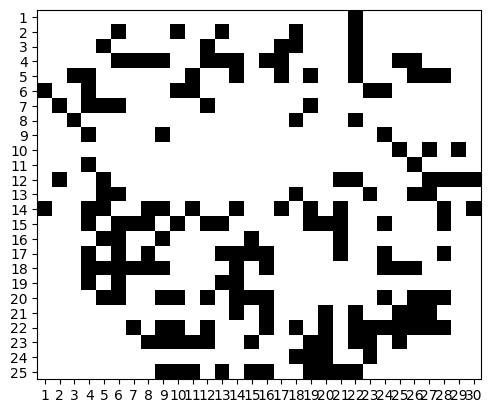

In [21]:
show_model(model)

In [20]:
def model_to_bitmap(model,vpool):
    positive_cells = [vpool.obj(l) for l in model if l > 0 and vpool.obj(abs(l)) is not None]

    if not positive_cells:
        return np.zeros((0, 0))

    max_row = max(r for r, c in positive_cells)
    max_col = max(c for r, c in positive_cells)

    bitmap = np.zeros((max_row, max_col), dtype=int)
    for row, col in positive_cells:
        bitmap[row - 1, col - 1] = 1

    return bitmap

In [22]:
def show_bitmap(bitmap, position=None):
    matrix = bitmap.astype(bool)

    h, w = matrix.shape

    plt.clf()
    plt.imshow(~matrix, cmap='gray', interpolation='nearest')

    if position is not None:
        i, j = position
        plt.scatter(j - 1, i - 1, color='red')

    plt.xticks(ticks=np.arange(w), labels=np.arange(1, w + 1))
    plt.yticks(ticks=np.arange(h), labels=np.arange(1, h + 1))
    plt.grid(False)
    plt.show()

In [ ]:
# my_bitmap = model_to_bitmap(model, vpool)
# show_bitmap(my_bitmap)
# show_bitmap(cat_bitmap)

In [21]:
def bitmap_to_model(bitmap, vpool):
    height, width = bitmap.shape
    model = []

    for i in range(height):
        for j in range(width):
            var = vpool.id((i + 1, j + 1))
            if bitmap[i, j] == 1:
                model.append(var)
            else:
                model.append(-var)

    return model

In [22]:
# slope diagonals image encodings

"""
Diagonals with slope 1/k
. . . . x x
. . x x . .
x x . . . . (when k = 2)
"""

def get_a_with_slope_vector(bitmap, k):
    m, n = bitmap.shape
    a_with_slope_vector = []
    total_groups = m + int(np.ceil(n / k)) - 1
    
    for i in range(total_groups):
        diag_sum = 0
        for j in range(max(0, i - m + 1), min(i + 1, int(np.ceil(n / k)))):
            for l in range(k):
                col = j * k + l
                row = i - j
                if col < n and row < m:
                    diag_sum += bitmap[row, col]
        a_with_slope_vector.append(diag_sum)
    
    return np.array(a_with_slope_vector)

def get_b_with_slope_vector(bitmap, k):
    m, n = bitmap.shape
    b_with_slope_vector = []
    total_groups = m + int(np.ceil(n / k)) - 1

    for i in range(total_groups):
        diag_sum = 0
        for j in range(max(0, i - m + 1), min(i + 1, int(np.ceil(n / k)))):
            for l in range(k):
                col = n - 1 - (j * k + l)
                row = i - j
                if 0 <= col < n and 0 <= row < m:
                    diag_sum += bitmap[row, col]
        b_with_slope_vector.append(diag_sum)

    return np.array(b_with_slope_vector)

In [ ]:
# frames image encoding

"""
xxxxxxxxxx
x********x
x*@@@@@@*x
x*@....@*x
x*@.$$.@*x
x*@....@*x
x*@@@@@@*x
x********x
xxxxxxxxxx
"""

# to do

In [ ]:
import time

def encode_tomography(encoding):
    vpool = IDPool()
    cnf = CNF()

    encode_rows(cnf, vpool, rows, encoding)
    encode_cols(cnf, vpool, cols, encoding)

    encode_a_diagonals(cnf, vpool, a, encoding)
    encode_b_diagonals(cnf, vpool, b, encoding)

    # k=2
    # a_slope = get_a_with_slope_vector(cat_bitmap, k)
    # b_slope = get_b_with_slope_vector(cat_bitmap, k)

    # encode_a_slope_diagonals(cnf, vpool, a_slope, k, encoding)
    # encode_b_slope_diagonals(cnf, vpool, b_slope, k, encoding)
    
    return cnf, vpool

def measure_encoding_performance(encoding):
    """Build and solve the CNF, measuring size and time."""

    t0 = time.time()
    cnf, vpool = encode_tomography(encoding)
    build_time = time.time() - t0

    t1 = time.time()
    solver = Cadical195(bootstrap_with=cnf)
    #solver = Glucose3(bootstrap_with=cnf)
    sat = solver.solve()
    solve_time = time.time() - t1

    n_vars = max(abs(lit) for clause in cnf.clauses for lit in clause)
    n_clauses = len(cnf.clauses)

    return {
        "encoding": encoding,
        "vars": n_vars,
        "clauses": n_clauses,
        "build_time": build_time,
        "solve_time": solve_time,
        "satisfiable": sat
    }

def compare_encodings():
    encodings = [1,2,3] # 1=seqcounter, 2=totalizer, 3=cardnetw
    results = [measure_encoding_performance(enc) for enc in encodings]

    print(f"{'Encoding':<12} {'Vars':<8} {'Clauses':<10} {'Build(s)':<10} {'Solve(s)':<10} {'SAT?'}")
    for r in results:
        print(f"{r['encoding']:<12} {r['vars']:<8} {r['clauses']:<10} "
              f"{r['build_time']:<10.4f} {r['solve_time']:<10.4f} {r['satisfiable']}")
        
compare_encodings()

Encoding     Vars     Clauses    Build(s)   Solve(s)   SAT?
1            24208    47083      0.1631     7.4785     True
2            84402    125715     0.4043     48.8470    True
3            69235    102969     0.3494     46.1890    True


In [ ]:
# write a script for RCI cluster which runs each scenario multiple times and computes the average

In [27]:
from itertools import product

In [28]:
# Lexicographically first model
def lexicographically_first_model(cnf, vpool):
    assumptions = []

    with Cadical195(bootstrap_with=cnf) as solver:
        while True:
            print('Tail of assumptions:', assumptions[-5:], flush=True)

            if solver.solve(assumptions=assumptions):
                model = solver.get_model()

                model_set = set(model)

                for i, j in product(range(1, m + 1), range(1, n + 1)):
                    var = vpool.id((i, j))

                    if var in set(assumptions):
                        assert var in model_set
                        if i == m and j == n:
                            return model

                    elif -var in set(assumptions):
                        assert -var in model_set
                        if i == m and j == n:
                            return model
                    else:
                        if -var in model_set:
                            assumptions.append(-var)
                        elif var in model_set:
                            assumptions.append(-var)
                            show_model(model, position=(i, j))
                            break
                        else:
                            raise
            else:
                var = assumptions.pop()
                assert var < 0, var
                print(vpool.obj(-var))
                assumptions.append(-var)

Tail of assumptions: []


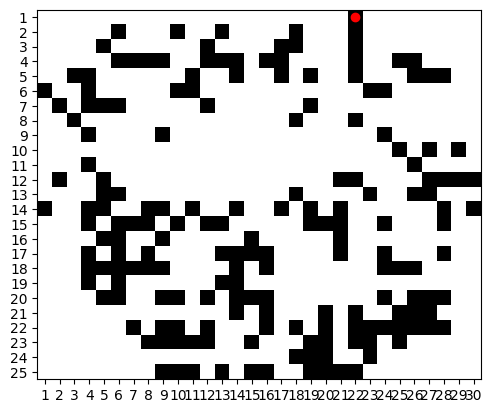

Tail of assumptions: [-18, -19, -20, -21, -22]


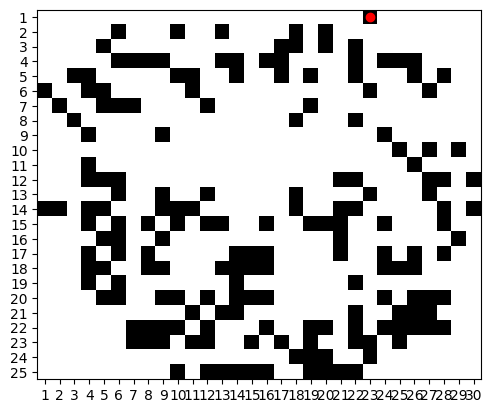

Tail of assumptions: [-19, -20, -21, -22, -23]


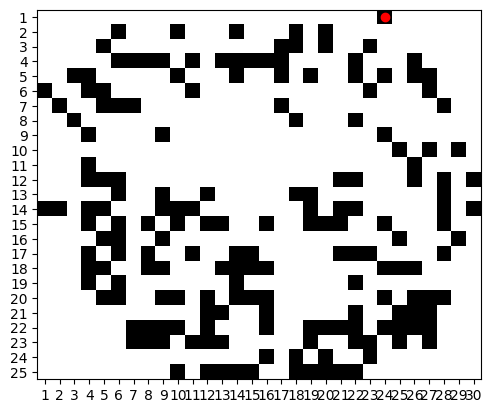

Tail of assumptions: [-20, -21, -22, -23, -24]
(1, 24)
Tail of assumptions: [-20, -21, -22, -23, 24]


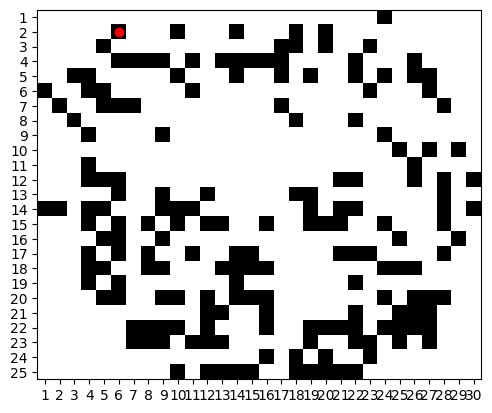

Tail of assumptions: [-32, -33, -34, -35, -36]


error: Caught keyboard interrupt

In [29]:
model2 = lexicographically_first_model(cnf, vpool)

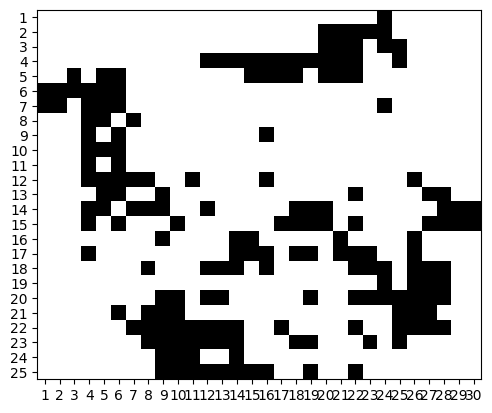

In [ ]:
show_model(model2)

In [ ]:
#from pysat.allies.approxmc import Counter
#with Counter(formula=cnf, epsilon=0.1, delta=0.9, verbose=1000) as counter:
#    num = counter.count(projection=range(1, m*n + 1))
#    print(num)

In [ ]:
cnf.to_file('dt.cnf')

In [ ]:
with open('dt.cnf_ganak', 'w') as fwrite:
    with open('dt.cnf', 'r') as fread:
        for line in fread:
            if line.startswith('p cnf'):
                fwrite.write(line)
                fwrite.write('c t pmc\n')
                fwrite.write(f"c p show {' '.join([str(i) for i in range(1, m*n + 1)])} 0\n")                
            else:
                fwrite.write(line)

        

In [ ]:
# https://github.com/meelgroup/ganak
#
# karel@dai-06:~/tmp/dt$ ./ganak dt.cnf_ganak 


In [ ]:
# show approxmc only for vars 300-303
#
#(pysat) karel@dai-06:~/tmp/dt$ approxmc.py -v 0 -p 300-303 dt.cnf
#s mc 14
